<a href="https://colab.research.google.com/github/soodeh-nilforoushan/NLP-Transformers/blob/main/Machine_Translation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Translation:**
machine translation similar to summarization is an example of seq2seq task.

it can be used like an RNN and Transformers

**Translation Evaluation**

1.   BLUE (Bilingual Evaluation Understudy) score is the most popular metric.
2.   the best correlated with human judgment.

1.   **three Facts**:

*   Prediction is compared with multiple refrence texts.(multiple possible answers)
*   is a value between 0 and 1
*   looks at a precision of n-grams(n=1,2,3,4)



In [21]:
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

File ‘spa-eng.zip’ already there; not retrieving.



In this model we wanna see how the model performs on the dataset.

In [22]:
!unzip -nq spa-eng.zip

In [23]:
!ls

sample_data  spa-eng  spa-eng.zip


In [24]:
ls spa-eng

_about.txt  spa.txt


In [25]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [26]:
#compile eng-spa translations
# we wanna save the words in a dictionary since the key can be input phrase and value can be possible target phrases.
eng2spa={}
for line in open('spa-eng/spa.txt'):
  line=line.rstrip()
  eng,spa=line.split("\t")
  if eng not in eng2spa:
    eng2spa[eng]=[]
  eng2spa[eng].append(spa)

In [31]:
tokens=tokenizer.tokenize('Él renunció.'.lower())
#the first argument is the list of acceptable translation and the second argument would be the model output
sentence_bleu([tokens],tokens)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.491668146240062e-154

In [27]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [28]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [29]:
#blue function works with tokens rather than raw text
from nltk.tokenize import RegexpTokenizer
# this is simple tokenizer that removes punctuation
tokenizer=RegexpTokenizer(r'\w+')

In [30]:
tokenizer.tokenize('Él renunció.'.lower())

['él', 'renunció']

In [32]:
sentence_bleu([['hi']],['hi'])

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.821831989445342e-231

In [61]:
smoother=SmoothingFunction()
sentence_bleu(['hi'],'hi', smoothing_function=smoother.method4)
#the result doe not make sence since unput and output are the same

0.2213885886251307

In [34]:
#bleu works on tokens of any thing even integers
sentence_bleu([[1,2,3,4]],[1,2,3,4])

1.0

In [35]:
#we need to pretokenize target
eng2spa_tokens={}
for eng,spa_list in eng2spa.items():
  spa_list_tokens=[]
  for text in spa_list:
    tokens=tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng]=spa_list_tokens

In [36]:
!pip install transformers sentencepiece transformers[sentencepiece]

In [37]:
from transformers import pipeline
translator=pipeline("translation", model='Helsinki-NLP/opus-mt-en-es', device=0)


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [38]:
translator("i like eggs and ham")

[{'translation_text': 'Me gustan los huevos y el jamón'}]

In [40]:
#check how many english phrases we have so that we know how many samples we have to translate
eng_phrases=list(eng2spa.keys())
len(eng_phrases)

102904

In [41]:
eng_phrases[20000]

'Tom is in the garden.'

In [63]:
#this many samples is way too much for our compute cpabilities to handle
#so we slect 1000
#because we know we get warning with short phrases we compute the bleu score
eng_phrases_subset=eng_phrases[20_500:21_000]

In [64]:
#translate phrases we selected
translations=translator(eng_phrases_subset)

In [65]:
translations[0]

{'translation_text': '¿Dónde están las manzanas?'}

In [66]:
#compute blue score for each translation we got back
scores=[]
for eng,pred in zip(eng_phrases_subset,translations):
  matches=eng2spa_tokens[eng]

  #tokenize translation
  spa_pred = tokenizer.tokenize(pred['translation_text'].lower())

  score=sentence_bleu(matches,spa_pred)
  scores.append(score)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [67]:
print(eng2spa_tokens["You know what I like."])

[['sabes', 'lo', 'que', 'me', 'gusta']]


(array([330.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          9.,   0.,   0.,   0.,   1.,   6.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 150.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

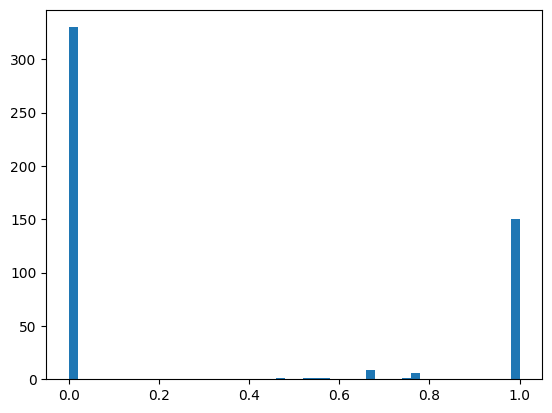

In [68]:
import matplotlib.pyplot as plt
plt.hist(scores,bins=50)

it shows we get precise translation for about 75 phrases

In [69]:
import numpy as np
np.mean(scores)

0.3271812080138605

In [70]:
np.random.seed(1)

In [73]:
#this function print just smaples
def print_random_translation():
  i=np.random.choice(len(eng_phrases_subset))
  eng=eng_phrases_subset[i]
  print("EN: ", eng)

  translation=translations[i]['translation_text']
  print("ES Translation:", translation)

  matches=eng2spa[eng]
  print("matches: ", matches)


In [74]:
print_random_translation()

EN:  Where's the bus stop?
ES Translation: ¿Dónde está la parada de autobús?
matches:  ['¿Dónde está la parada del autobús?']


In [75]:
print_random_translation()

EN:  You seem unperturbed.
ES Translation: Pareces inalterado.
matches:  ['Pareces despreocupado.']


In [76]:
print_random_translation()

EN:  Can I open the window?
ES Translation: ¿Puedo abrir la ventana?
matches:  ['¿Puedo abrir la ventana?']


In [77]:
print_random_translation()

EN:  Who runs things here?
ES Translation: ¿Quién dirige las cosas aquí?
matches:  ['¿Quién dirige las cosas aquí?']


In [78]:
print_random_translation()

EN:  You'll figure it out.
ES Translation: Lo averiguarás.
matches:  ['Tú lo averiguarás.']
